<a href="https://colab.research.google.com/github/jimypeter/Pohang_Earthquake/blob/master/Settlement_NN_PI_3_1H_Wkshop_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install -U -q PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#!pip install keras
#!pip install tensorflow
#!pip install seaborn
#!pip uninstall tensorflow==2.0.0
# !pip3 install ann_visualizer
# !pip install graphviz
# !sudo apt-get install graphviz
# !pip3 install graphviz
# !apt-get install xdg-utils
# import os
# os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'
#import tensorflow as tf
#print(tf.__version__)
#!pip install tensorflow==1.14

In [ ]:
 # The shareable link
link = 'https://drive.google.com/open?id=1NCrd_ES9mPUM3WM_ws2D3dY6HwkaXXze'
fluff, id = link.split('=')

# Verify that you have everything after '='
print (id) 

1NCrd_ES9mPUM3WM_ws2D3dY6HwkaXXze


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import keras
import tensorflow as tf
from tensorflow import keras
from pylab import rcParams
from matplotlib import rc
%matplotlib inline
rcParams['figure.figsize'] = 10, 5

Using TensorFlow backend.


In [ ]:
#Load dataset
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Numerical_settlement_Pohang_Wkshop.csv') 
data = pd.read_csv('Numerical_settlement_Pohang_Wkshop.csv', header=0)
data.head()

,Depth (m),Unit Weight (kN/m3),N1(60),CSR,Settlement (mm)
0,1,20,11,0.33,0.5
1,2,20,11,0.31,0.5
2,3,20,14,0.29,0.8
3,4,20,16,0.28,1.4
4,5,20,5,0.27,3.3


In [ ]:
data.shape

(100, 5)

In [ ]:
data.describe()

,Depth (m),Unit Weight (kN/m3),N1(60),CSR,Settlement (mm)
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,10.500000,18.960000,13.620000,0.314300,0.898000
std,5.795331,1.869046,8.722177,0.044523,0.873629
min,1.000000,16.000000,0.000000,0.210000,0.000000
25%,5.750000,18.000000,7.000000,0.290000,0.300000
50%,10.500000,20.000000,11.000000,0.320000,0.600000
75%,15.250000,21.000000,25.000000,0.340000,1.400000
max,20.000000,21.000000,25.000000,0.390000,3.400000


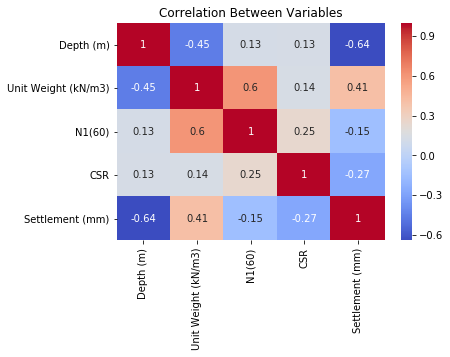

In [ ]:
# Knowing The Data
#Correlation heatmap
corr = data.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr,xticklabels=True,yticklabels=True,annot = True,cmap ='coolwarm', square=True)///
sns.heatmap(corr,xticklabels=True,yticklabels=True,annot = True,cmap ='coolwarm', square=True)
plt.title("Correlation Between Variables")
plt.savefig('2.png')

# pair Plot
# sns.pairplot(data,palette="husl",diag_kind="kde")
# plt.savefig('2.png')

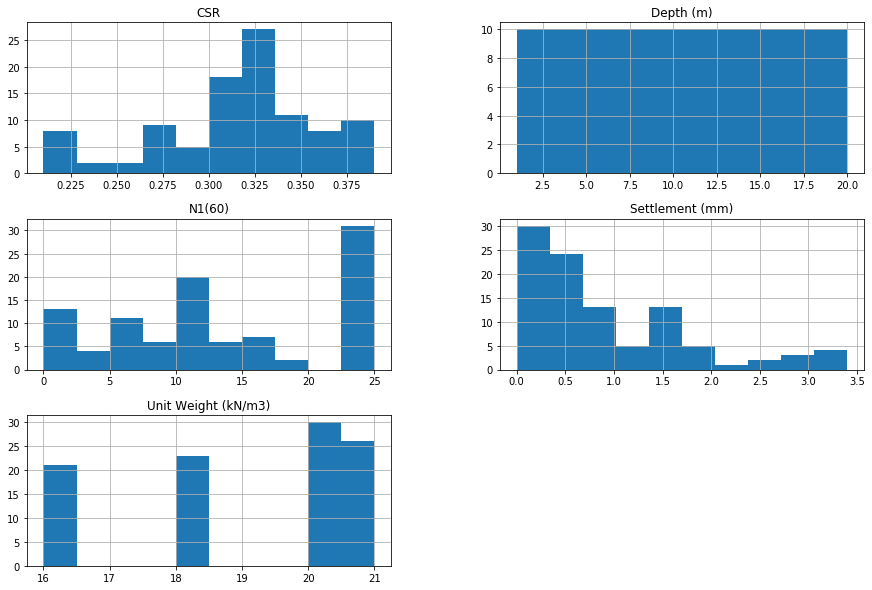

In [ ]:
%matplotlib inline
data.hist(figsize=(15,10))
plt.show()

In [ ]:
# x_org = data.drop(['Unit Weight (kN/m3)','Settlement (mm)'],axis=1)
x_org = data.drop(['Settlement (mm)'], axis=1)
y_org = data['Settlement (mm)'].values

In [ ]:
x_org

,Depth (m),Unit Weight (kN/m3),N1(60),CSR
0,1,20,11,0.33
1,2,20,11,0.31
2,3,20,14,0.29
3,4,20,16,0.28
4,5,20,5,0.27
...,...,...,...,...
95,16,18,11,0.33
96,17,18,12,0.32
97,18,16,14,0.32
98,19,16,10,0.32


In [ ]:
# Using Test/Train Split
from sklearn.model_selection import train_test_split
from numpy.random import seed

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(x_org,y_org, test_size=0.30, random_state=seed)

# Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(-1,1))
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# sc.mean_
# sc.scale_

In [ ]:
X_train

array([[-0.47368421,  0.6       , -0.16666667,  0.11111111],
       [ 0.47368421,  1.        ,  1.        ,  0.22222222],
       [-0.26315789,  1.        ,  0.        ,  0.66666667],
       [ 0.89473684,  1.        ,  1.        ,  0.        ],
       [ 0.36842105, -1.        , -1.        ,  1.        ],
       [-0.68421053, -0.2       , -0.25      , -0.11111111],
       [ 0.68421053, -1.        , -1.        ,  1.        ],
       [-0.89473684,  0.6       ,  0.33333333,  0.22222222],
       [ 0.26315789, -1.        , -1.        ,  0.88888889],
       [ 0.05263158,  1.        ,  1.        ,  0.88888889],
       [-0.78947368,  0.6       ,  0.41666667, -0.33333333],
       [ 1.        , -1.        , -0.5       ,  0.22222222],
       [ 0.36842105, -1.        , -1.        , -1.        ],
       [ 1.        ,  1.        ,  1.        ,  0.        ],
       [-0.89473684, -0.2       , -0.41666667, -0.22222222],
       [ 0.05263158, -0.2       ,  1.        ,  0.11111111],
       [ 0.68421053, -1.

In [ ]:
# Building ANN As a Regressor
from tensorflow import set_random_seed
set_random_seed(seed)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from keras import backend
#from keras.wrappers.scikit_learn import KerasRegressor
#from sklearn.model_selection import GridSearchCV
#from sklearn.pipeline import Pipeline
#Defining Root Mean Square Error As our Metric Function 
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

In [ ]:
from numpy.random import seed
seed(5)

# create model

model = Sequential()
#Building  first layer Layers 
# model.add(Dense(8, input_dim=3, kernel_initializer='glorot_normal', activation = 'sigmoid', name="dense_input" ))
model.add(Dense(8,input_dim=4, kernel_initializer='glorot_normal', activation = 'sigmoid', name="dense_input" ))
# model.add(keras.layers.normalization.BatchNormalization())

# Output Layer
model.add(Dense(1, name="dense_output", activation='linear'))
# model.add(Dense(1, kernel_initializer='normal', name="dense_output", use_bias=True, activation='linear'))

In [ ]:
#Optimize , Compile And Train The Model 
from keras import optimizers
opt = optimizers.Adam(lr=0.9)
# opt = optimizers.RMSprop(lr=0.02)
# opt = optimizers.SGD(lr=0.001, momentum=0.6)

model.compile(optimizer=opt,loss='mean_squared_error',metrics=[rmse])

# history = model.fit(X_train,y_train,epochs = 100 ,batch_size=32,validation_split=0.1)
history = model.fit(X_train,y_train,epochs = 60 ,batch_size=32,validation_split=0.1)
print(model.summary())

Train on 63 samples, validate on 7 samples
Epoch 1/60
63/63 [==============================] - 0s 3ms/step - loss: 4.3376 - rmse: 1.8340 - val_loss: 1.1237 - val_rmse: 0.9864
Epoch 2/60
63/63 [==============================] - 0s 173us/step - loss: 1.5285 - rmse: 1.0395 - val_loss: 0.8100 - val_rmse: 0.7073
Epoch 3/60
63/63 [==============================] - 0s 147us/step - loss: 1.2115 - rmse: 0.8231 - val_loss: 2.3408 - val_rmse: 1.3991
Epoch 4/60
63/63 [==============================] - 0s 153us/step - loss: 1.3144 - rmse: 0.9053 - val_loss: 0.6219 - val_rmse: 0.5499
Epoch 5/60
63/63 [==============================] - 0s 146us/step - loss: 0.3423 - rmse: 0.4612 - val_loss: 0.4932 - val_rmse: 0.6628
Epoch 6/60
63/63 [==============================] - 0s 199us/step - loss: 0.7480 - rmse: 0.7257 - val_loss: 0.5733 - val_rmse: 0.6639
Epoch 7/60
63/63 [==============================] - 0s 204us/step - loss: 0.7112 - rmse: 0.6760 - val_loss: 0.3517 - val_rmse: 0.5045
Epoch 8/60
63/63 [===

In [ ]:
# weight_H1= pd.DataFrame(model.layers[0].get_weights())
# weight_H1
# model.layers[0].get_weights()
# model.layers[1].get_weights()

In [ ]:
# save model and architecture to single file
# model.save("model_PI.h5")
# print("Saved model to disk")

In [ ]:
# Predicting and Finding R Squared Score

y_predict = model.predict(X_test)

from sklearn.metrics import r2_score
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))

0.8464856671473351


In [ ]:
# from ann_visualizer.visualize import ann_viz;

# ann_viz(model, view=True, filename="network.gv", title="My NN graph")

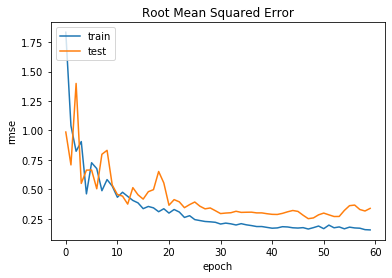

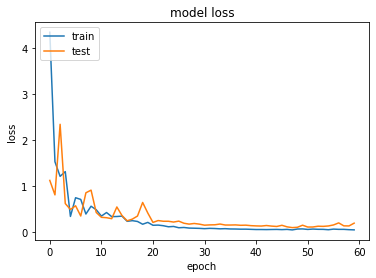

In [ ]:
# Plotting Loss And Root Mean Square Error For both Training And Test Sets
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('Root Mean Squared Error')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('4.png')
plt.show()

In [ ]:
y_predict

array([[ 0.01083493],
       [ 1.0113435 ],
       [-0.04467654],
       [ 0.6114847 ],
       [ 1.0879809 ],
       [ 0.38548285],
       [ 0.5394012 ],
       [ 0.6476496 ],
       [ 1.1134409 ],
       [ 1.0466083 ],
       [ 0.4001137 ],
       [ 1.4197326 ],
       [ 0.5727374 ],
       [ 0.40714693],
       [ 0.5937259 ],
       [ 1.6281044 ],
       [ 0.4112451 ],
       [ 1.2859247 ],
       [ 0.1528508 ],
       [ 0.35468692],
       [ 0.6569909 ],
       [ 1.5801544 ],
       [ 0.36977953],
       [ 1.5725405 ],
       [ 3.1539383 ],
       [-0.22942162],
       [ 0.6114847 ],
       [ 0.1569367 ],
       [-0.00764632],
       [ 1.0789847 ]], dtype=float32)

In [ ]:
y_test

array([0. , 0.8, 0. , 0.6, 1. , 0.3, 0.7, 0.5, 0.9, 1.6, 0.3, 0.6, 0.6,
       0.2, 0.6, 1.8, 0.3, 1.4, 0.4, 0.3, 0.7, 0.8, 0.2, 1.4, 3.4, 0.1,
       0.6, 0. , 0. , 1. ])

In [ ]:
X_test

array([[ 0.78947368, -1.        , -1.        ,  1.        ],
       [-0.36842105,  1.        ,  0.41666667,  0.44444444],
       [ 0.89473684, -1.        , -0.83333333, -0.88888889],
       [ 0.15789474,  1.        ,  1.        ,  0.33333333],
       [-0.05263158, -0.2       ,  0.        ,  0.44444444],
       [ 0.57894737, -0.2       ,  1.        ,  0.22222222],
       [ 0.36842105,  1.        ,  1.        ,  0.33333333],
       [ 0.15789474,  1.        ,  1.        ,  0.77777778],
       [-0.36842105,  0.6       ,  0.16666667,  0.44444444],
       [-0.78947368,  0.6       ,  0.33333333,  0.        ],
       [ 0.36842105, -0.2       ,  1.        ,  0.22222222],
       [-1.        , -0.2       , -0.58333333, -0.66666667],
       [ 0.26315789,  1.        ,  1.        ,  0.33333333],
       [ 0.26315789, -0.2       ,  1.        ,  0.22222222],
       [-0.15789474,  1.        ,  1.        ,  0.44444444],
       [-0.47368421, -0.2       , -0.25      ,  0.        ],
       [ 0.15789474, -0.

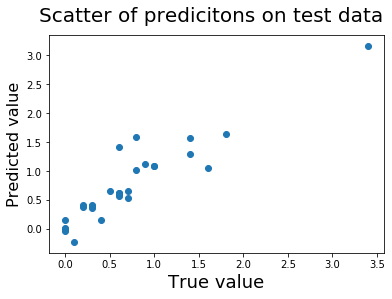

In [ ]:
#Plot scatter  of predictions
plt.suptitle('Scatter of predicitons on test data', fontsize=20)
plt.xlabel('True value', fontsize=18)
plt.ylabel('Predicted value', fontsize=16)
plt.scatter(y_test, y_predict)

plt.show()

In [ ]:
# Write to csv format
# data['Settlement'] = pd.Series(y_predict.reshape(1, -1)[0])
# predicted_data = pd.concat([data['Settlement']])
# predicted_data.to_csv('predicted_Norm_data.csv', index=False)

In [ ]:
# from google.colab import files
# # Write to csv format
# data['Settlement'] = pd.Series(y_predict.reshape(1, -1)[0])
# predicted_data = pd.concat([data['Settlement']])
# predicted_data.to_csv('Pred_settlement_data2.csv', index=False)
# files.download('Pred_settlement_data2.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """


In [ ]:
from google.colab import files
# Write to csv format
history_rmse= pd.Series(history.history['rmse'].reshape(1, -1)[0])
history_rmse = pd.Series(history.history['rmse'])
history_val_rmse = pd.Series(history.history['val_rmse'])
history_loss = pd.Series(history.history['loss'])
history_val_loss = pd.Series(history.history['val_loss'])
metric_data = pd.concat([pd.DataFrame(history_rmse), pd.DataFrame(history_val_rmse), pd.DataFrame(history_loss), pd.DataFrame(history_val_loss)], axis=1)
metric_data.to_csv('Metric_settlement_data2.csv', index=False)
files.download('Metric_settlement_data2.csv')
# history['rmse']